# Project ( Product-Sales-Outlet-at-BigMart-Datawarehouse )
## Submitted by(" Usman Nasir ")

# Problem Statement

### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Hypothesis generation

### 1. Number of quantity of products:
#### :. The more the number of quantity of products sale out from a store the more it will increase sales to that particular store

### 2: Price of product:
#### we should look at the price of each product, it more expensive or in other words the price of some products ishigh it will definitely increases the sale at the store

### 3.More supply of products that sell out the most
#### we have to look at the previous records and find the products that sell out the most in order to increase the supply of that product the most to increase our sale

## Lets move ahead to wrok with data

# Loading important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
test_data=pd.read_csv('Test.csv')
train_data=pd.read_csv('Train.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test_data.shape

(5681, 11)

In [6]:
train_data.shape

(8523, 12)

In [7]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [8]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Exploratory data analysis

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [13]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
train_data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [15]:
train_data['Item_Weight'].mean()

12.857645184136183

In [16]:
train_data['Item_Weight'].max()

21.35

In [17]:
train_data['Item_Weight'].min()

4.555

In [18]:
# we will handle missing values by fillling it with mean values
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [19]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
train_data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [21]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
train_data['Outlet_Size'].fillna(method='bfill',inplace=True)

In [23]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
train_data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3         High
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [25]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [26]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [27]:
test_data['Outlet_Size'].fillna(method='bfill',inplace=True)

In [28]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  3
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Now our data is completletely clean 

In [29]:
train_data.shape

(8523, 12)

In [30]:
corr=train_data.corr()

<AxesSubplot:>

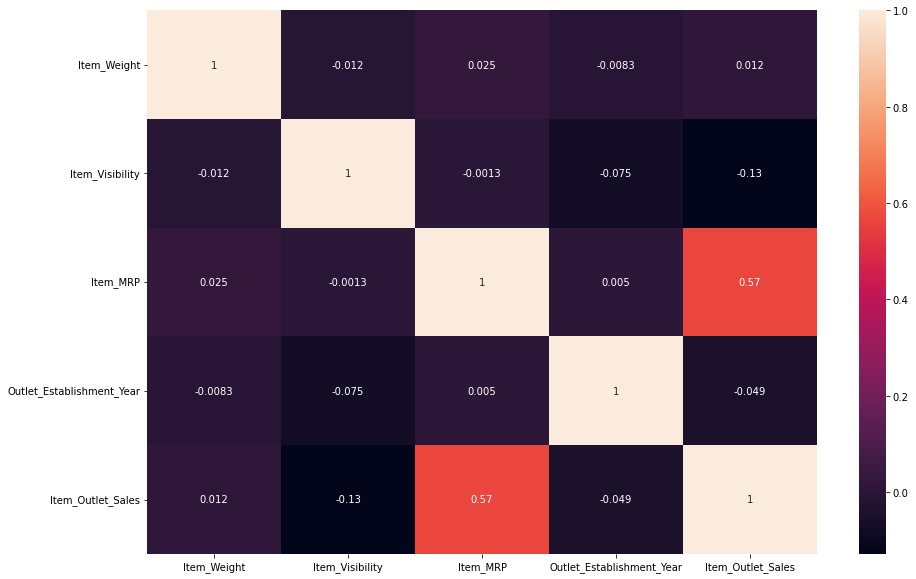

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [32]:
train_data.duplicated().sum()

0

In [33]:
test_data.duplicated().sum()

0

In [34]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [35]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [36]:
train_data.groupby(['Item_Type','Outlet_Size'])['Item_Outlet_Sales'].sum()

Item_Type              Outlet_Size
Baking Goods           High           2.168198e+05
                       Medium         6.317104e+05
                       Small          4.169952e+05
Breads                 High           6.831641e+04
                       Medium         2.725359e+05
                       Small          2.123849e+05
Breakfast              High           3.257027e+04
                       Medium         1.249367e+05
                       Small          7.479198e+04
Canned                 High           1.752885e+05
                       Medium         7.336963e+05
                       Small          5.351667e+05
Dairy                  High           2.420496e+05
                       Medium         7.619022e+05
                       Small          5.186422e+05
Frozen Foods           High           2.401121e+05
                       Medium         9.344390e+05
                       Small          6.511837e+05
Fruits and Vegetables  High           4.380418e

In [37]:
train_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

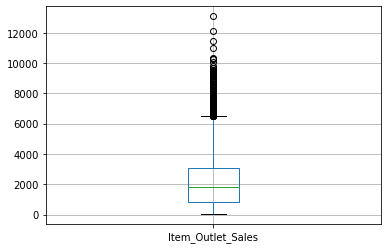

In [38]:
train_data.boxplot(column=['Item_Outlet_Sales'])

In [39]:
q1,q3=train_data['Item_Outlet_Sales'].quantile([0.25,0.75])

In [40]:
q1

834.2474

In [41]:
q3

3101.2964

In [42]:
iqr=q3-q1

In [43]:
lower_range=q1-(1.5*iqr)
upper_range=q3+(1.5*iqr)

In [44]:
lower_range

-2566.3261

In [45]:
upper_range

6501.8699

In [46]:
train_data[(train_data['Item_Outlet_Sales']<lower_range)|(train_data['Item_Outlet_Sales']>upper_range)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.857645,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,12.857645,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,12.857645,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.000000,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.350000,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588.1226


# These are all my outliers

In [47]:
train_clean=train_data[(train_data['Item_Outlet_Sales']>lower_range)&(train_data['Item_Outlet_Sales']<upper_range)]

In [48]:
train_clean.shape

(8337, 12)

In [49]:
train_data.shape

(8523, 12)

<AxesSubplot:>

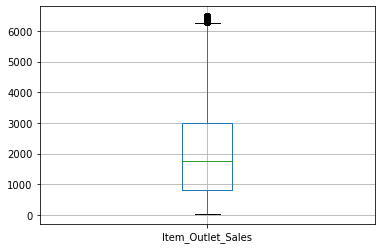

In [50]:
# after removing outliers
train_clean.boxplot(column=['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

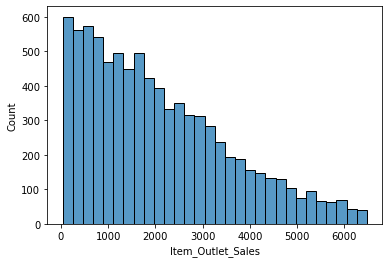

In [51]:
sns.histplot(x='Item_Outlet_Sales',data=train_clean)

In [52]:
train_clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
train_clean.shape

(8337, 12)

In [54]:
test_data.shape

(5681, 11)

In [55]:
# Univariate analysis
train_clean['Item_Outlet_Sales'].std()

1506.099754349844

In [56]:
train_clean['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
221.7114      1
637.1706      1
238.3564      1
6351.7320     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3322, dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

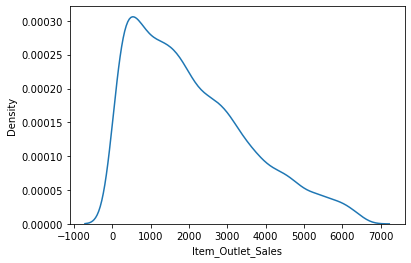

In [57]:
sns.kdeplot(x=train_clean['Item_Outlet_Sales'])

C:\Users\usman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Item_Outlet_Sales'>

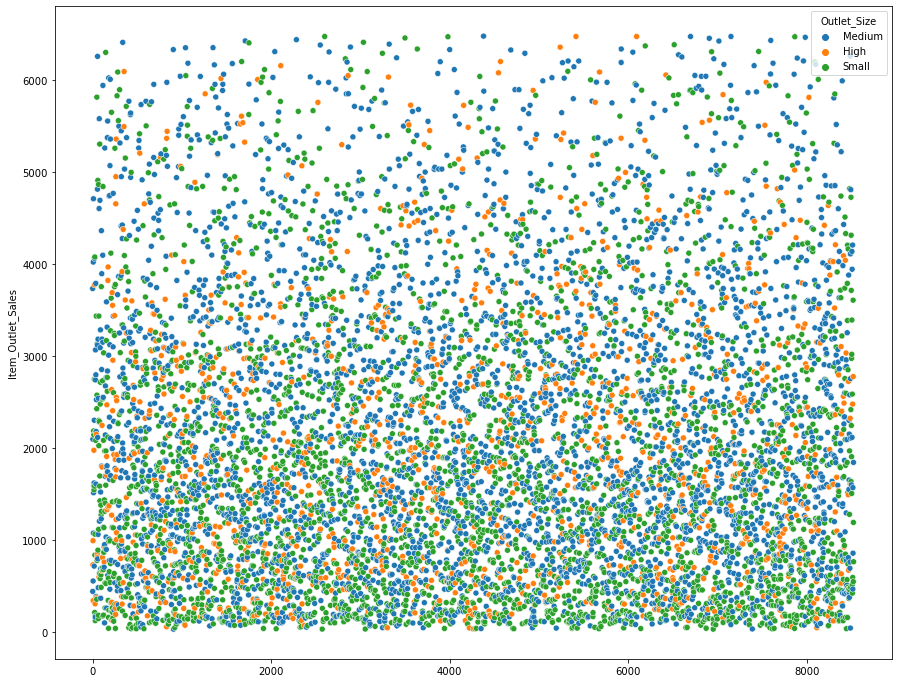

In [58]:
plt.figure(figsize=(15,12))
sns.scatterplot(train_clean.index,train_clean['Item_Outlet_Sales'],hue=train_clean['Outlet_Size'])

In [59]:
item=train_data['Item_Type'].value_counts()

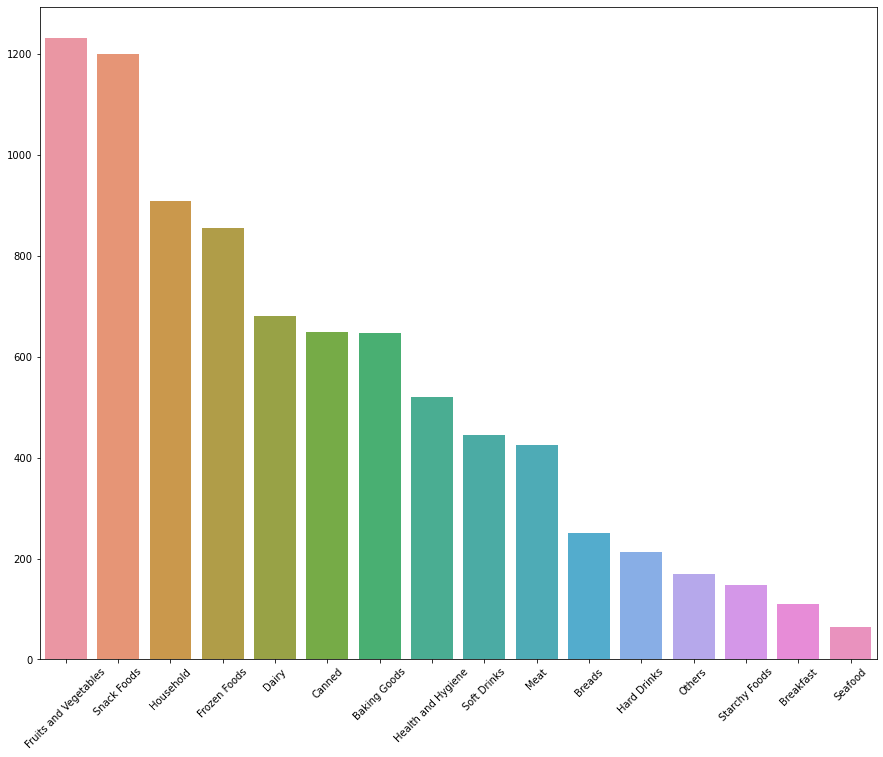

In [60]:
plt.figure(figsize=(15,12))
sns.barplot(x=item.index,y=item.values)
plt.xticks(rotation=45)
plt.show()

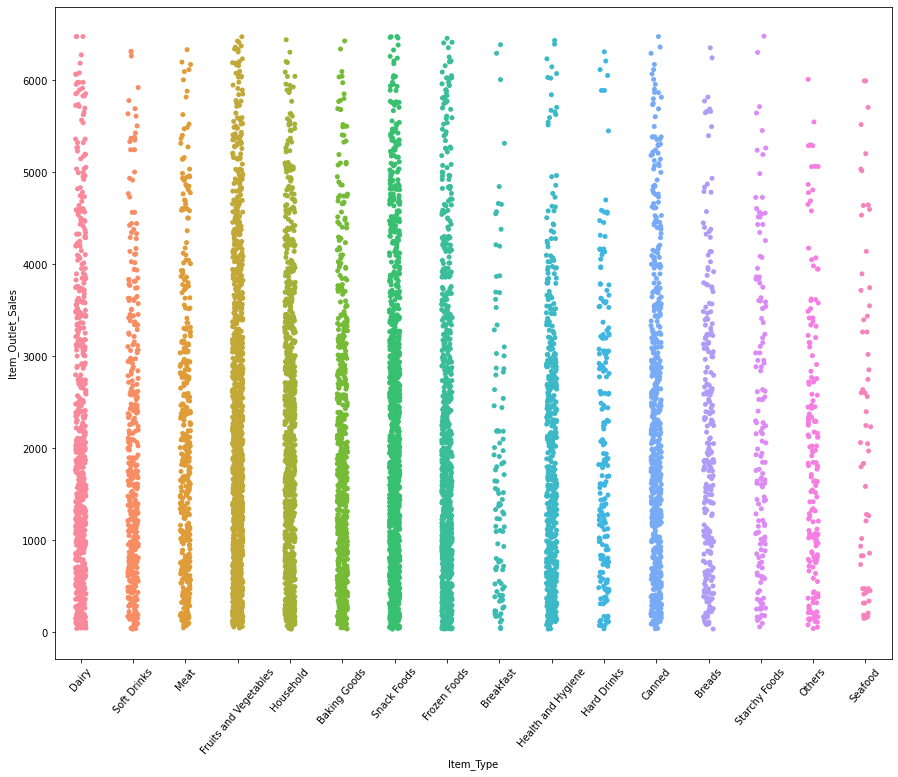

In [61]:
plt.figure(figsize=(15,12))
sns.stripplot(x=train_clean['Item_Type'],y=train_clean['Item_Outlet_Sales'])
plt.xticks(rotation=50)
plt.show()

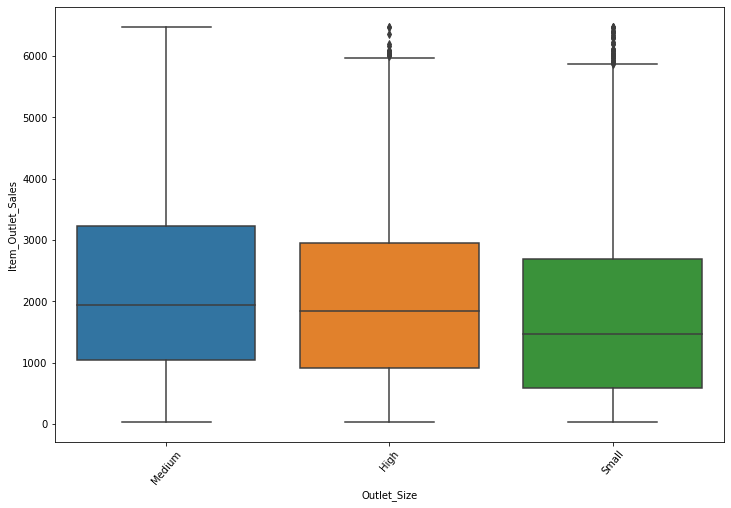

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x=train_clean['Outlet_Size'],y=train_clean['Item_Outlet_Sales'])
plt.xticks(rotation=50)
plt.show()

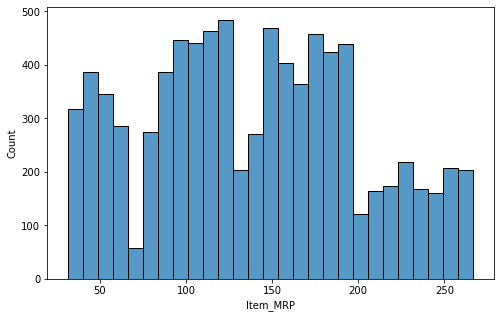

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(train_clean, x="Item_MRP")
plt.show()

In [64]:
item_fat=train_clean['Item_Fat_Content'].value_counts()

<AxesSubplot:>

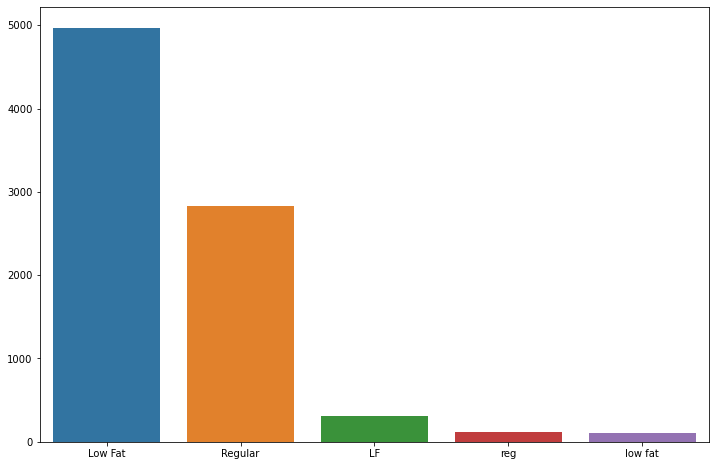

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x=item_fat.index,y=item_fat.values)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

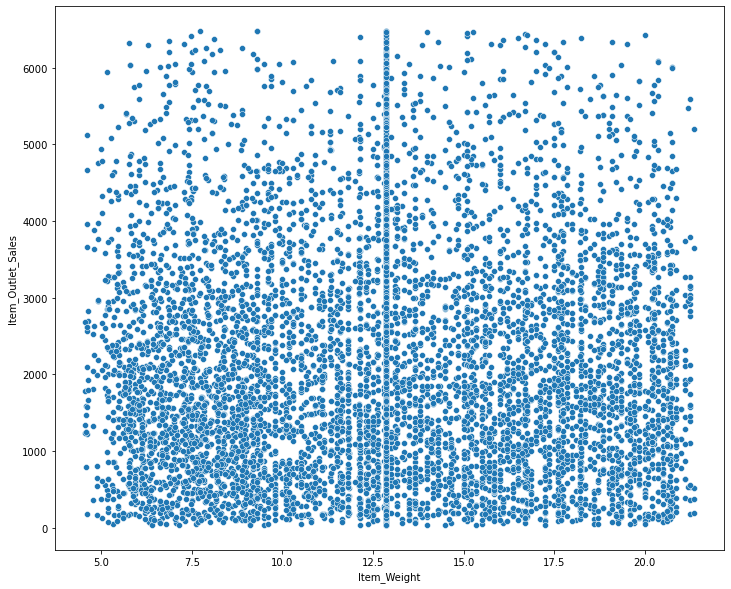

In [66]:
# Bivariate analysis
plt.figure(figsize=(12,10))
sns.scatterplot(x=train_clean['Item_Weight'],y=train_clean['Item_Outlet_Sales'])

# No correlation

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

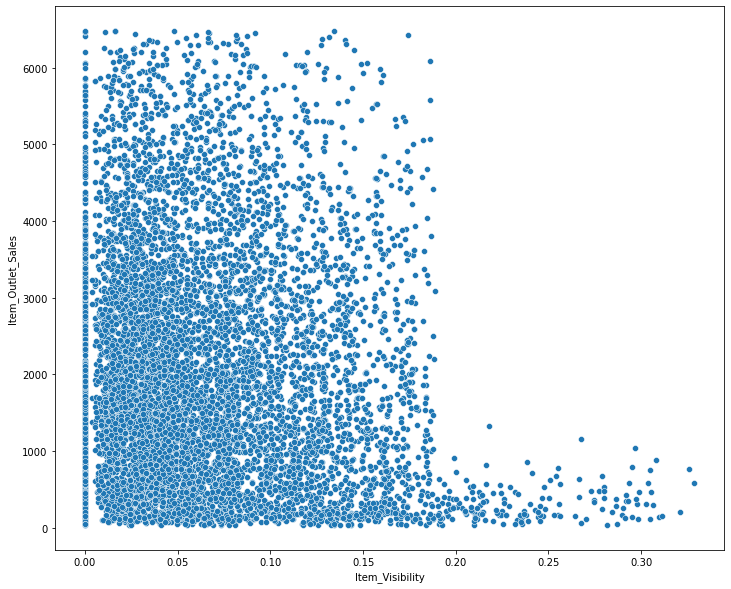

In [67]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=train_clean['Item_Visibility'],y=train_clean['Item_Outlet_Sales'])

# Negative corelation

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

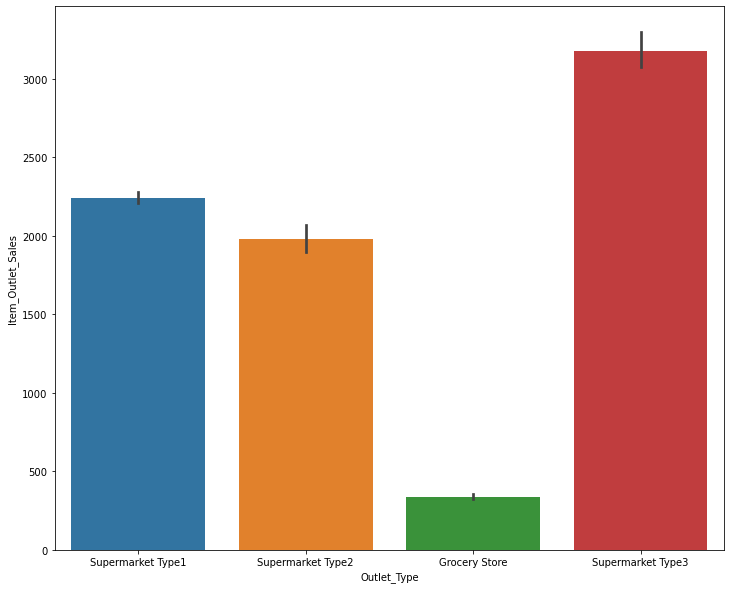

In [68]:
plt.figure(figsize=(12,10))
sns.barplot(x=train_clean['Outlet_Type'],y=train_clean['Item_Outlet_Sales'])

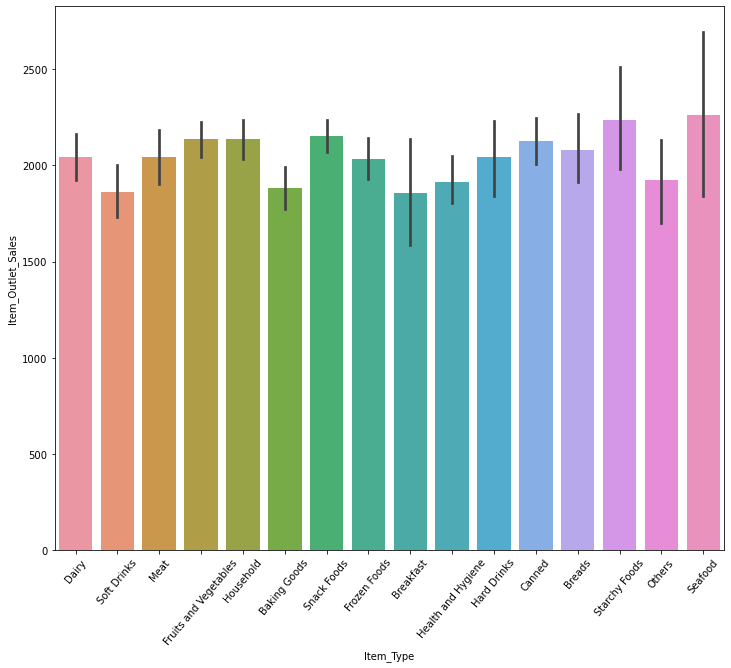

In [69]:
plt.figure(figsize=(12,10))
sns.barplot(x=train_clean['Item_Type'],y=train_clean['Item_Outlet_Sales'])
plt.xticks(rotation=50)
plt.show()

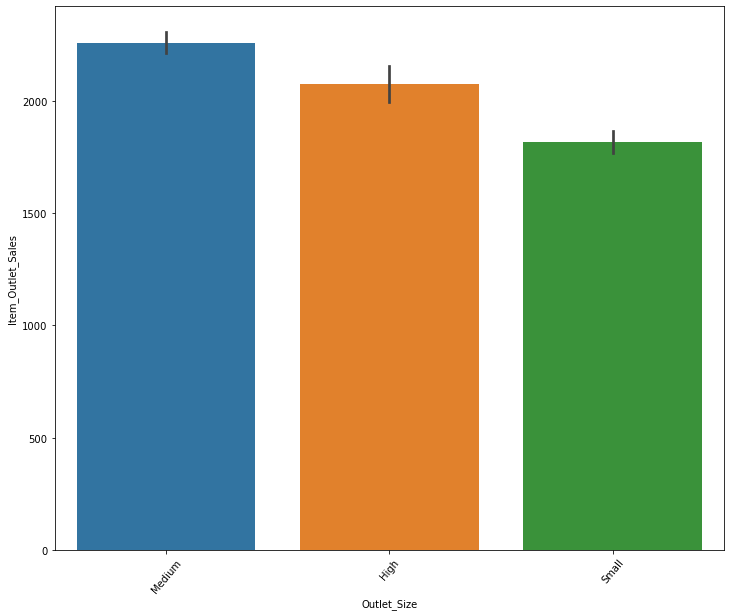

In [70]:
plt.figure(figsize=(12,10))
sns.barplot(x=train_clean['Outlet_Size'],y=train_clean['Item_Outlet_Sales'])
plt.xticks(rotation=50)
plt.show()

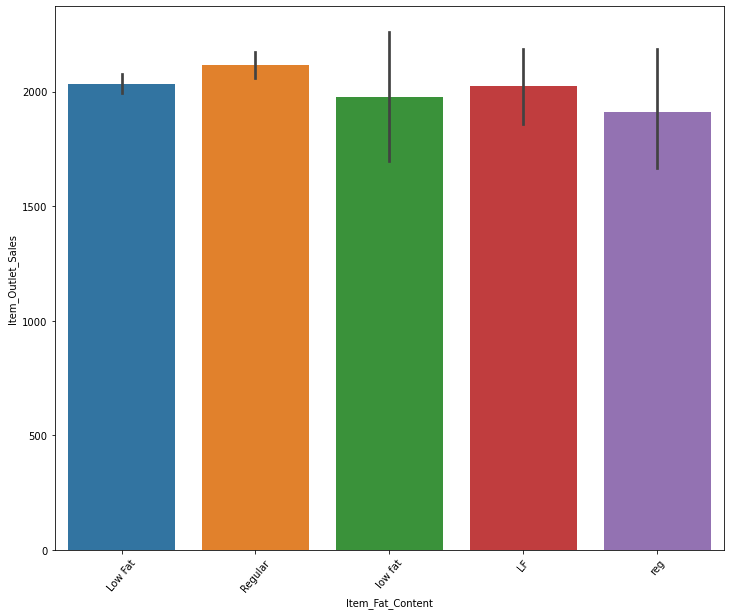

In [71]:
plt.figure(figsize=(12,10))
sns.barplot(x=train_clean['Item_Fat_Content'],y=train_clean['Item_Outlet_Sales'])
plt.xticks(rotation=50)
plt.show()

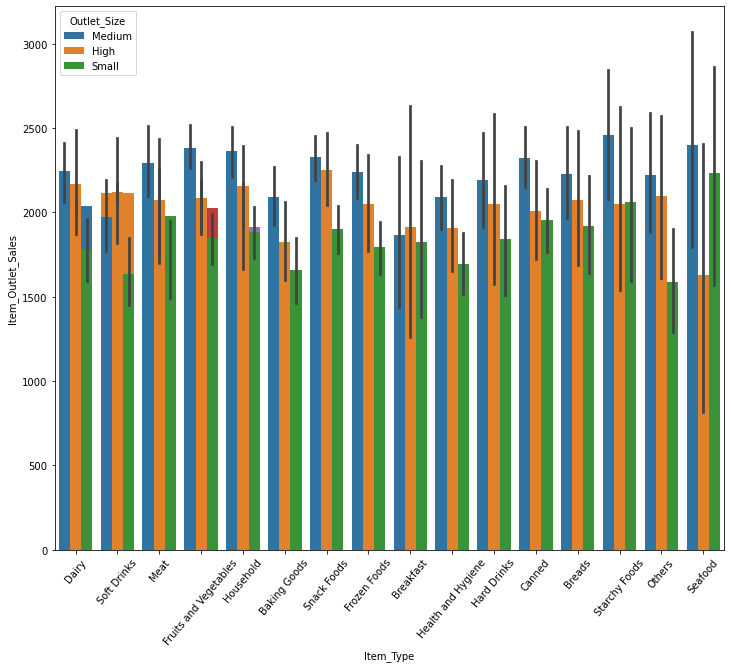

In [72]:
plt.figure(figsize=(12,10))
sns.barplot(x=train_clean['Item_Fat_Content'],y=train_clean['Item_Outlet_Sales'])
sns.barplot(x=train_clean['Item_Type'],y=train_clean['Item_Outlet_Sales'],hue=train_clean['Outlet_Size'])
plt.xticks(rotation=50)
plt.show()

# Feature engineering

<AxesSubplot:>

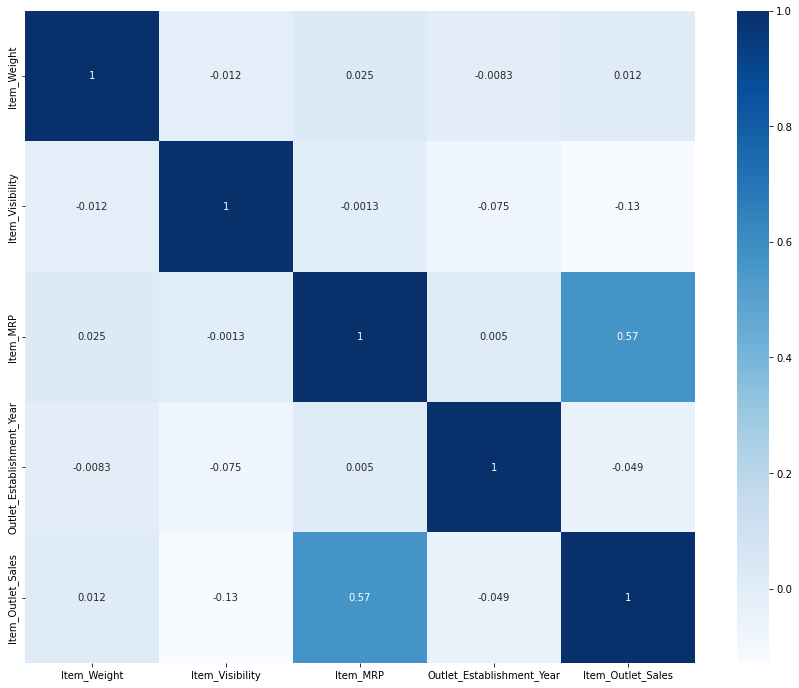

In [73]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap='Blues')

In [74]:
train_clean.corr()['Item_Outlet_Sales']

Item_Weight                  0.012866
Item_Visibility             -0.131628
Item_MRP                     0.553334
Outlet_Establishment_Year    0.007101
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [75]:
train_clean_new=train_clean.drop(['Outlet_Identifier','Item_Identifier'],axis=1)

In [76]:
train_clean_new.shape

(8337, 10)

In [77]:
train_clean.shape


(8337, 12)

In [78]:
fat_item_Dumm = pd.get_dummies(train_clean_new['Item_Fat_Content'], columns=['Item_Fat_Content'], drop_first=True)


In [79]:
train_clean_new=pd.concat([train_clean_new, fat_item_Dumm], axis=1)

In [80]:
train_clean_new.drop('Item_Fat_Content',axis=1,inplace=True)

In [81]:
train_clean_new

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Low Fat,Regular,low fat,reg
0,9.300,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0,0,0
1,5.920,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1,0,0
2,17.500,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0,0,0
3,19.200,0.000000,Fruits and Vegetables,182.0950,1998,High,Tier 3,Grocery Store,732.3800,0,1,0,0
4,8.930,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,1,0,0,0
8519,8.380,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850,0,1,0,0
8520,10.600,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,1,0,0,0
8521,7.210,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,1,0,0


In [82]:
train_clean_new.shape

(8337, 13)

In [83]:
# One hot Enhoding
dummies_items=pd.get_dummies(train_clean_new[['Item_Type','Outlet_Size','Outlet_Location_Type',
                                      'Outlet_Type']],
                       columns=['Item_Type','Outlet_Size','Outlet_Location_Type',
                                      'Outlet_Type'],drop_first=True)

In [84]:
dummies_items.shape

(8337, 22)

In [85]:
columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [86]:
train_clean_new=pd.concat([train_clean_new,dummies_items],axis=1)

In [87]:
train_clean_new.drop(columns,axis=1,inplace=True)

In [88]:
train_clean_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Low Fat,Regular,low fat,reg,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [89]:
train_clean_new.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Low Fat                              uint8
Regular                              uint8
low fat                              uint8
reg                                  uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_S

In [90]:
fat_item_Dumm = pd.get_dummies(test_data['Item_Fat_Content'], columns=['Item_Fat_Content'], drop_first=True)


In [91]:
test_clean_new=pd.concat([test_data, fat_item_Dumm], axis=1)

In [92]:
test_clean_new.drop('Item_Fat_Content',axis=1,inplace=True)

In [93]:
dummies_items=pd.get_dummies(test_clean_new[['Item_Type','Outlet_Size','Outlet_Location_Type',
                                      'Outlet_Type']],
                       columns=['Item_Type','Outlet_Size','Outlet_Location_Type',
                                      'Outlet_Type'],drop_first=True)

In [94]:
columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [95]:
test_clean_new=pd.concat([test_clean_new,dummies_items],axis=1)

In [96]:
test_clean_new.drop(columns,axis=1,inplace=True)

In [97]:
test_clean_new

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Low Fat,Regular,low fat,reg,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0.007565,107.8622,OUT049,1999,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0.038428,87.3198,OUT017,2007,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2,NCN55,14.600000,0.099575,241.7538,OUT010,1998,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,OUT017,2007,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,FDY38,12.695633,0.118599,234.2300,OUT027,1985,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,0.013496,141.3154,OUT046,1997,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
5677,FDD47,7.600000,0.142991,169.1448,OUT018,2009,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
5678,NCO17,10.000000,0.073529,118.7440,OUT045,2002,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5679,FDJ26,15.300000,0.000000,214.6218,OUT017,2007,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [98]:
test_clean_new.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [99]:
train_clean_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Low Fat,Regular,low fat,reg,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [100]:
train_clean_new.shape

(8337, 31)

In [101]:
test_clean_new.shape

(5681, 30)

In [102]:
test_clean_new.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Low Fat', 'Regular', 'low fat', 'reg',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [103]:
train_clean_new.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Low Fat', 'Regular',
       'low fat', 'reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [104]:
X=train_clean_new.drop('Item_Outlet_Sales',axis=1)

In [105]:
y=train_clean_new['Item_Outlet_Sales']

In [106]:
y


0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8337, dtype: float64

In [107]:
X.shape

(8337, 30)

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [109]:
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(X_test), columns = X.columns)

# Linear Regression

In [110]:
ln=LinearRegression()

In [111]:
ln.fit(X_train,y_train)

LinearRegression()

In [112]:
y_pred=ln.predict(X_test)

In [113]:
ln.score(X_train,y_train)

0.5609479026239765

In [114]:
r2_score(y_test,y_pred)

0.5344781964806902

In [115]:
ln.coef_

array([ 2.24956446e+00, -4.17819991e+01,  1.39247597e+01,  4.23308766e+00,
        1.50872519e+01,  5.24665729e+01,  7.80477950e+01, -5.37440710e+01,
        4.68569322e+00, -1.28814465e+02,  3.74066861e+01, -1.16085009e+02,
       -2.71977788e+01,  5.45158140e-01, -4.11073930e+01, -5.63694741e+01,
       -3.10796538e+01, -4.91314427e+01, -3.29494163e+01,  1.44141548e+02,
       -1.68928363e+01, -9.83167822e+01, -1.04202436e+02, -7.04362742e+00,
       -1.01853950e+01, -5.21610340e+01, -3.69332315e+01,  1.90958069e+03,
        1.55972917e+03,  3.02274967e+03])

In [116]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6669, 30), (1668, 30), (6669,), (1668,))

In [117]:
print(" Mean square error is:",mean_squared_error(y_test,y_pred))
print(" R2 score is:",r2_score(y_test,y_pred)) 

 Mean square error is: 1030665.4502711582
 R2 score is: 0.5344781964806902


In [118]:
y_pred_test=ln.predict(test_clean_new[:1668])

In [119]:
y_pred_test

array([1858.41744591, 1356.75304641, 1738.34301622, ..., 2731.45335561,
       3851.5787305 , 1636.00210667])

In [120]:
y_pred_test.shape

(1668,)

In [121]:
y_pred.shape

(1668,)

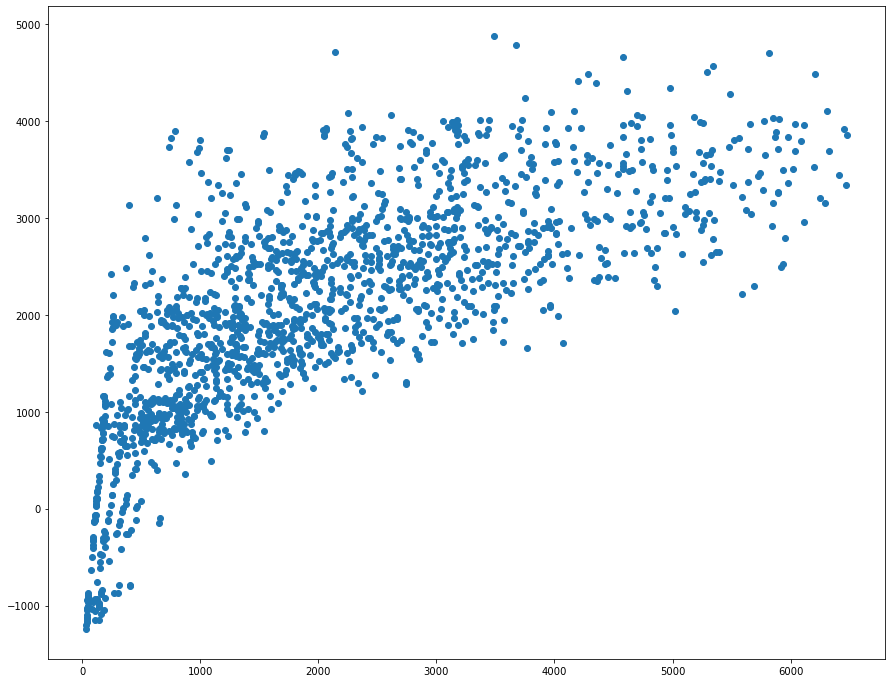

In [122]:
plt.figure(figsize=(15,12))
plt.scatter(y_test,y_pred)

In [123]:
np.abs(r2_score(y_test,y_pred_test))

0.5586280776129455

In [124]:
y_pred.shape

(1668,)

In [125]:
y_pred_test.shape

(1668,)

In [126]:
mse=math.sqrt(mean_squared_error(y_pred,y_pred_test))

In [127]:
print("Mean square error is:",math.sqrt(mean_squared_error(y_pred,y_pred_test)))


Mean square error is: 1592.973257874225


# Now applying regular linear regression
## 1.Ridge
## 2. Lasso

In [128]:
# Lasso linear regression
lasso=Lasso(alpha=20,max_iter=100,tol=0.1)

In [129]:
lasso.fit(X_train,y_train)

Lasso(alpha=20, max_iter=100, tol=0.1)

In [130]:
y_pred=lasso.predict(X_test)

In [131]:
r2_score(y_test,y_pred)

0.5164444585202194

In [132]:
y_pred=lasso.predict(test_clean_new)

In [133]:
np.abs(r2_score(y_test,y_pred[:1668]))

0.45052340531485346

In [134]:
# Ridge linear regression
ridge=Ridge(alpha=50,max_iter=100,tol=0.1)

In [135]:
ridge.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [136]:
y_pred=ridge.predict(X_test)

In [137]:
r2_score(y_test,y_pred)

0.5293330180713539

In [138]:
y_pred=lasso.predict(test_clean_new[:1668])

In [139]:
np.abs(r2_score(y_test,y_pred))

0.45052340531485346

In [140]:
mse=cross_val_score(ln,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)

In [141]:
mean_mse

-1017106.4384173602

# Random Forest Regression

In [145]:
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -742.003 (16.335)


In [147]:
model = RandomForestRegressor(n_estimators=100,criterion='mse')
model.fit(X_train,y_train)

C:\Users\usman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [148]:
y_pred=model.predict(X_test)

In [149]:
r2_score(y_test,y_pred)

0.5160220404830409

In [150]:
model.score(X_test,y_test)

0.5160220404830409

In [151]:
pred=model.predict(test_clean_new)

In [152]:
pred

array([1853.42075 , 1389.537916,  534.3045  , ..., 2227.993172,
       4380.191672, 1642.79492 ])

# XGboost

In [153]:
params={'learning' : [0.05,0.10,0.15,0.20,0.25,0.30],
       'max_depth' : [3,4,5,6,8,10,12,15],
       'min_child_weight' : [1,3,5,6],
       'gamma': [0.0,0.1,0.2,0.3,0.4],
       'Colsample_bytree': [0.3,0.4,0.5,0.7] 
       }

In [154]:
regr=XGBRegressor()

In [155]:
rand_search=RandomizedSearchCV(regr,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)

In [156]:
rand_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[18:02:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 1/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.2, max_depth=8, min_child_weight=6;, score=nan total time=   1.6s
[18:02:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 2/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.2, max_depth=8, min_child_weight=6;, score=nan total time=   1.1s
[18:03:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.2, max_depth=8, min_child_weight=6;, score=nan total time=   1.1s
[18:03:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 4/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.2, max_depth=8, min_child_weight=6;, score=nan total time=   1.1s
[18:03:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 5/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.2, max_depth=8, min_child_weight=6;, score=nan total time=   1.2s
[18:03:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 1/5] END Colsample_bytree=0.3, gamma=0.4, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.6s
[18:03:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 2/5] END Colsample_bytree=0.3, gamma=0.4, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.5s
[18:03:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END Colsample_bytree=0.3, gamma=0.4, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.7s
[18:03:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 4/5] END Colsample_bytree=0.3, gamma=0.4, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.6s
[18:03:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 5/5] END Colsample_bytree=0.3, gamma=0.4, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.5s
[18:03:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 1/5] END Colsample_bytree=0.7, gamma=0.0, learning=0.25, max_depth=6, min_child_weight=3;, score=nan total time=   0.8s
[18:03:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 2/5] END Colsample_bytree=0.7, gamma=0.0, learning=0.25, max_depth=6, min_child_weight=3;, score=nan total time=   0.9s
[18:03:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END Colsample_bytree=0.7, gamma=0.0, learning=0.25, max_depth=6, min_child_weight=3;, score=nan total time=   0.8s
[18:03:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 4/5] END Colsample_bytree=0.7, gamma=0.0, learning=0.25, max_depth=6, min_child_weight=3;, score=nan total time=   0.9s
[18:03:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 5/5] END Colsample_bytree=0.7, gamma=0.0, learning=0.25, max_depth=6, min_child_weight=3;, score=nan total time=   0.9s
[18:03:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 1/5] END Colsample_bytree=0.5, gamma=0.3, learning=0.3, max_depth=12, min_child_weight=6;, score=nan total time=   1.8s
[18:03:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 2/5] END Colsample_bytree=0.5, gamma=0.3, learning=0.3, max_depth=12, min_child_weight=6;, score=nan total time=   1.7s
[18:03:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END Colsample_bytree=0.5, gamma=0.3, learning=0.3, max_depth=12, min_child_weight=6;, score=nan total time=   1.7s
[18:03:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 4/5] END Colsample_bytree=0.5, gamma=0.3, learning=0.3, max_depth=12, min_child_weight=6;, score=nan total time=   1.7s
[18:03:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 5/5] END Colsample_bytree=0.5, gamma=0.3, learning=0.3, max_depth=12, min_child_weight=6;, score=nan total time=   1.8s
[18:03:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 1/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.6s
[18:03:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 2/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.5s
[18:03:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.5s
[18:03:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 4/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.5s
[18:03:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\usman\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
C:\Users\usman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


[CV 5/5] END Colsample_bytree=0.4, gamma=0.2, learning=0.25, max_depth=10, min_child_weight=3;, score=nan total time=   1.6s
[18:03:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                 

In [162]:
rand_search.best_params_

{'min_child_weight': 6,
 'max_depth': 8,
 'learning': 0.2,
 'gamma': 0.2,
 'Colsample_bytree': 0.4}

In [163]:
rand_search.best_estimator_

XGBRegressor(Colsample_bytree=0.4, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.2, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning=0.2,
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=6,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [164]:
xgb=XGBRegressor(Colsample_bytree=0.3, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning=0.25,
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0)

In [165]:
xgb.fit(X_train,y_train)

[18:03:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(Colsample_bytree=0.3, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=1, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning=0.25,
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [166]:
xgb_pred=xgb.predict(X_test)

In [167]:
r2_score(y_test,xgb_pred)

0.49615277450140516

In [168]:
score=cross_val_score(xgb,X_train,y_train,cv=5)

[18:03:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:03:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample_bytree", "learning" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:03:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Colsample

In [169]:
score.mean()

0.5353656590805095

In [170]:
score.max()

0.5599197928797472

# SUMMARY
1.The model will perform will if we had some extra data that has a great co-relation with our target
e.g:
#### quantity of product
#### per_month_sale

2: The Item_MRP,Item_Weight has a great impact on {" Item_Outlet_Sales "}

3: There were alot of columns in the data which dont have any rlation with the target Sales data

4:The overall date was not present

5: Item_Fat_Content,Item_Type were very great and interesting columns working on it